# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual(Mahesh Kumar Godara)


# **Project Summary -**


The project aims to analyze the impact of a high-profile fraud case involving Rana Kapoor on the stock prices of Yes Bank, a well-known bank in the Indian financial domain. The dataset used in this project consists of monthly stock prices of the bank since its inception, including the closing, starting, highest, and lowest stock prices for each month. The primary goal is to develop predictive models, such as regression models, to forecast the closing price of the bank's stock for each month. By examining the relationship between the fraud case and the stock prices, this project seeks to determine if predictive models can effectively capture and reflect such influential events.

---



# **GitHub Link -**

https://github.com/Mahesh9003

# **Problem Statement**


The objective of this project is to develop a regression model that accurately predicts the closing price of Yes Bank's stock. Yes Bank, a prominent bank in the Indian financial sector, has experienced significant volatility and faced challenges, including a high-profile fraud case involving Rana Kapoor. The project aims to address the following problems:

Forecasting Stock Prices: Develop a robust regression model to predict the closing price of Yes Bank's stock based on historical data. The model should take into account various factors such as market trends, historical prices, and any relevant external events that could impact the stock price.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np                                     # numerical computations
import pandas as pd                                    # data manipulations

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import plotly.express as px

from datetime import datetime                          # to convert to date

from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)
from sklearn.model_selection import train_test_split   # split train and test data


from sklearn.linear_model import LinearRegression      # regression model

from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)

import math

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab/Machine Learning/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv'
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [ ]:
df.shape
#shape of dataset

(185, 5)

In [ ]:
# Dataset Rows & Columns count
df_rows=len(df.axes[0])
df_columns=len(df.axes[1])
print('Number of rows :',df_rows)
print('Number of columns :',df_columns)

Number of rows : 185
Number of columns : 5


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

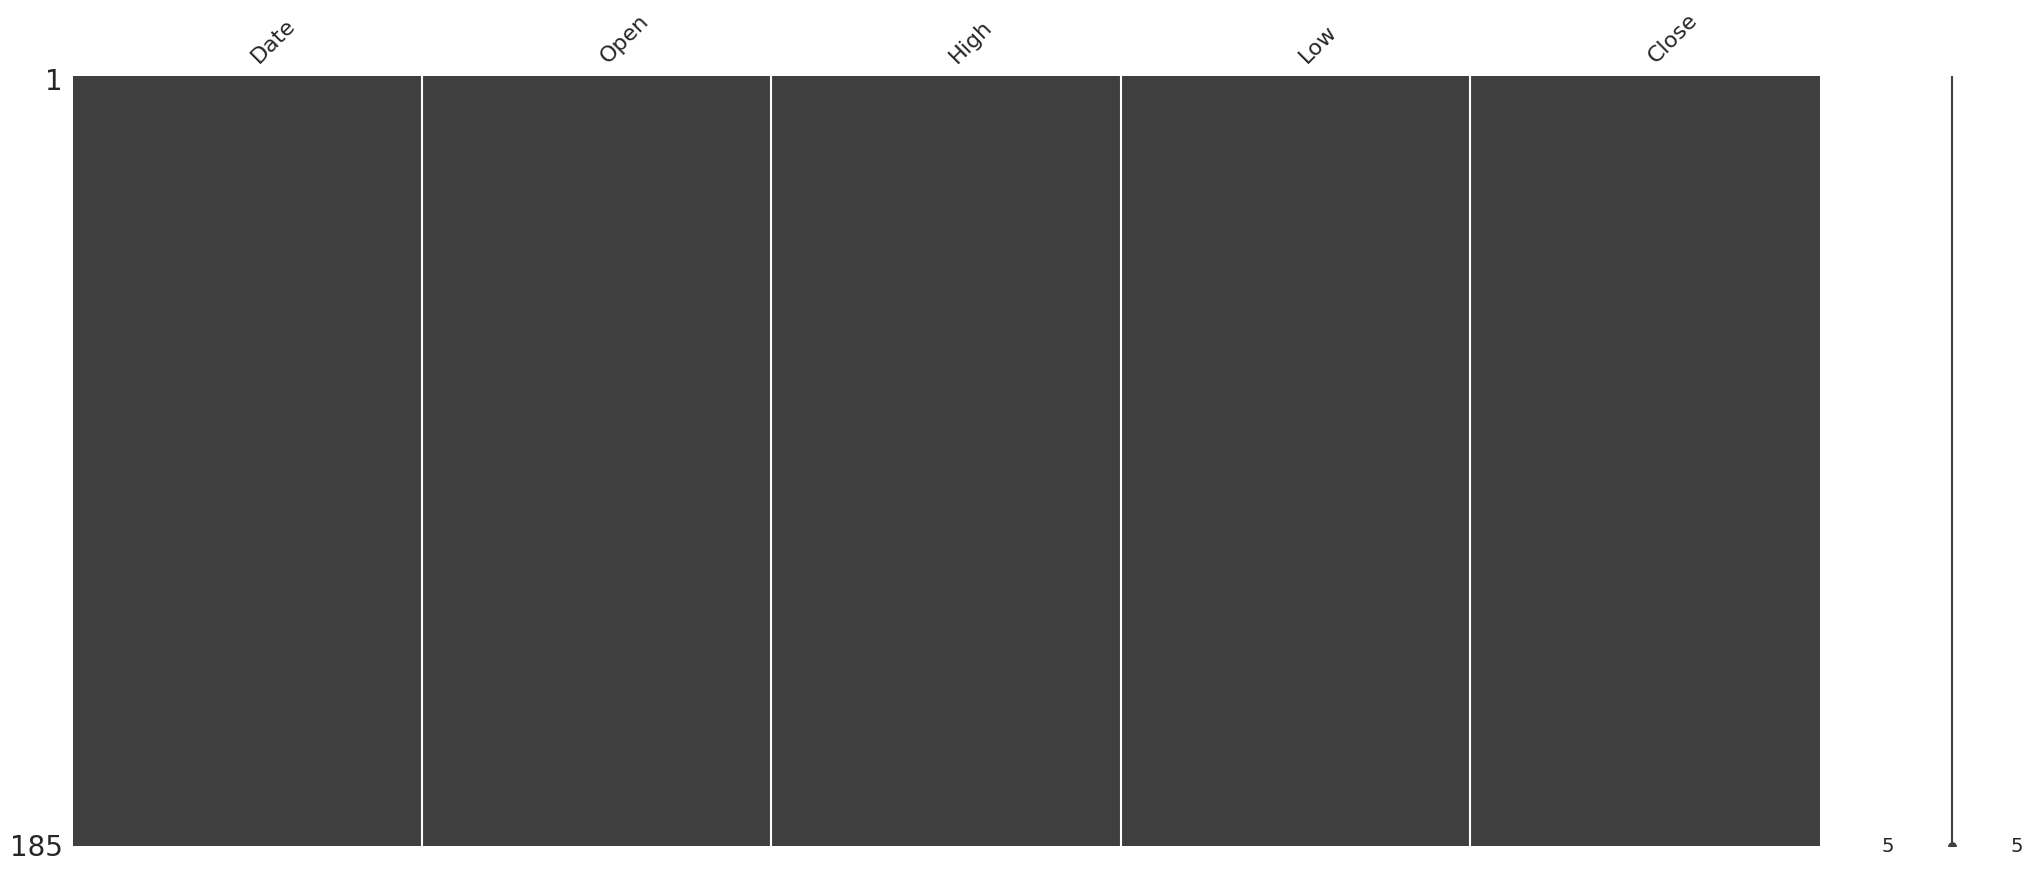

In [ ]:
# Visualizing the missing values
import missingno as msno

msno.matrix(df)

### What did you know about your dataset?

* we have seen 185 rows and 5 columns and no duplicate and null value present in our data .
* Date : The date (Month and Year provided)
* Open : The price of the stock at the beginning of a particular time period.
* High : The Peak(Maximum) price at which a stock traded during the period.
* Low : The Lowest price at which a stock traded during the period.
* Close : The trading price at the end (in this case end of the month).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 'Jul-14'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Let us now preserve the original data before we operate on it.
df1 = df.copy()

In [ ]:
# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [ ]:
# setting Date column as index.
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
#categorical columns
cat_columns=df.select_dtypes(include='object').columns
print(f'categorical columns:{list(cat_columns)}')

categorical columns:[]


In [ ]:
#non-categorical columns
num_columns=df.select_dtypes(exclude='object').columns
print('non-categorical columns:',list(num_columns))

non-categorical columns: ['Open', 'High', 'Low', 'Close']


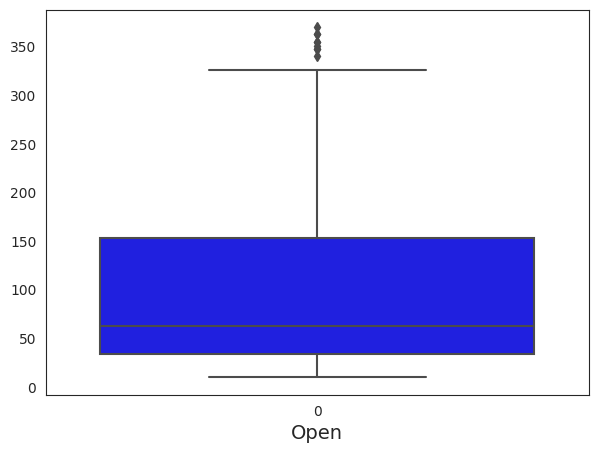

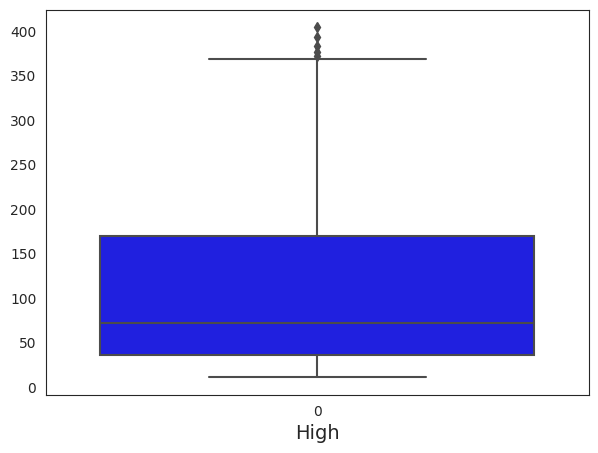

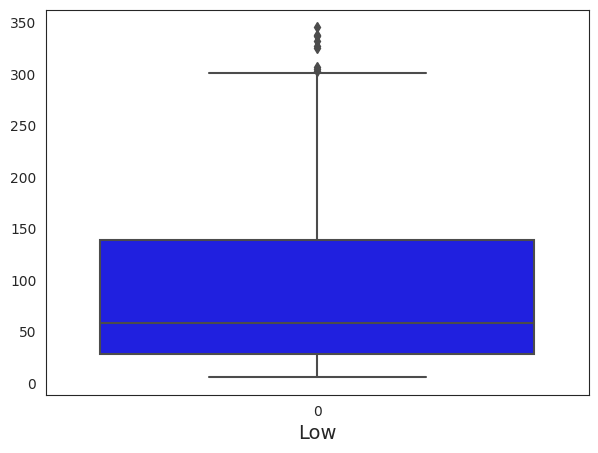

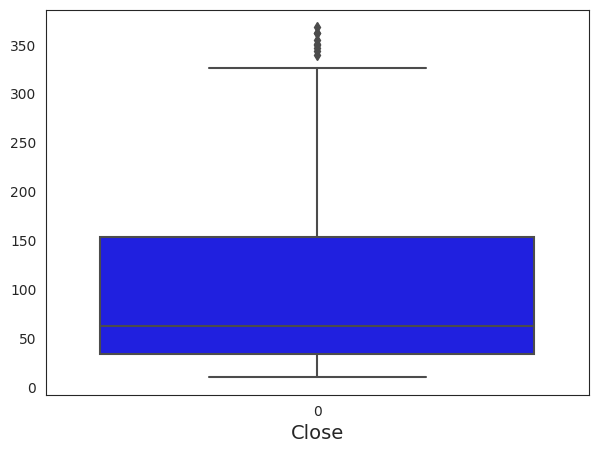

In [ ]:
#presence of outliers
for col in df.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(df[col],color='blue')
  plt.xlabel(col,fontsize=14)
  plt.show()

From above boxplot we can see there are some outliers present in our data. We need to deal with these before proceeding to modelling.

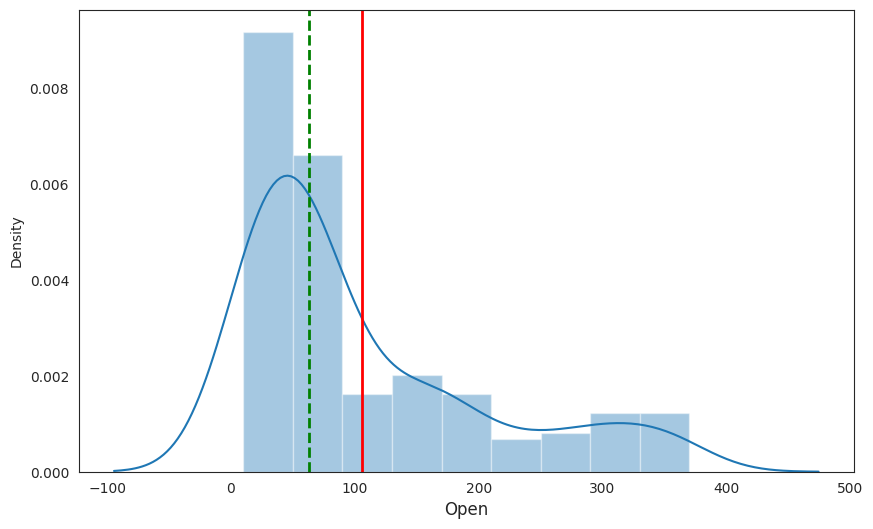

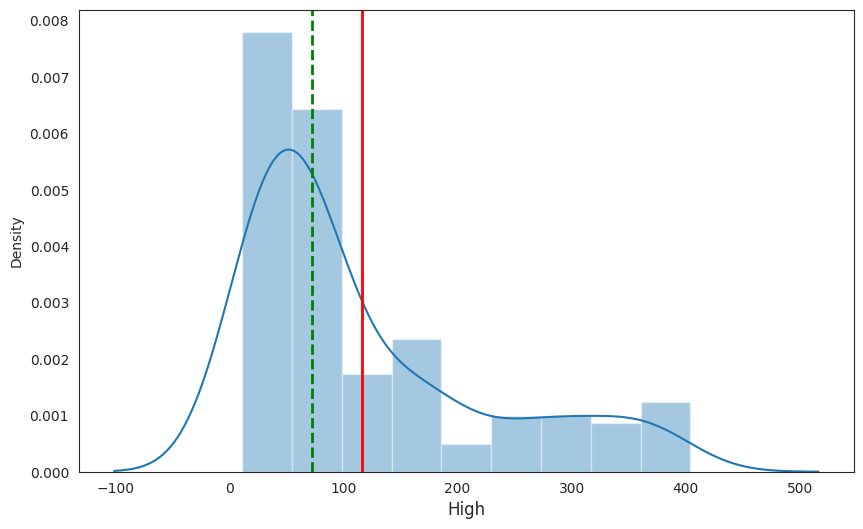

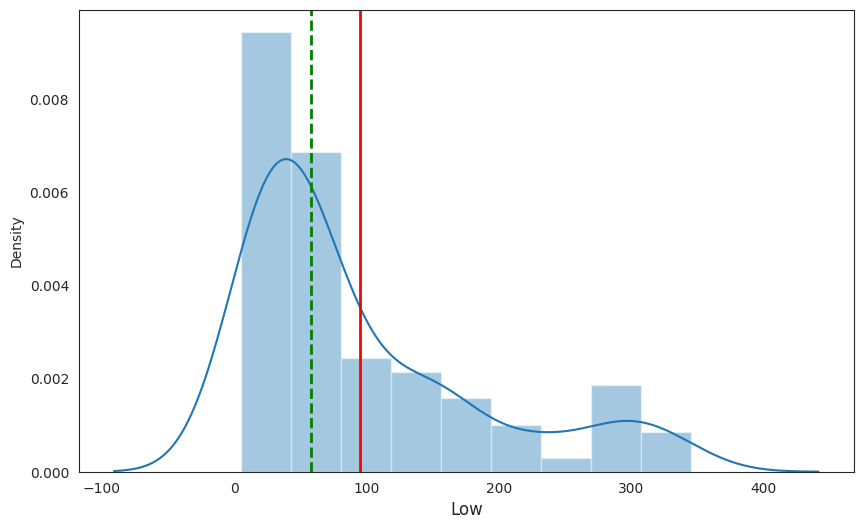

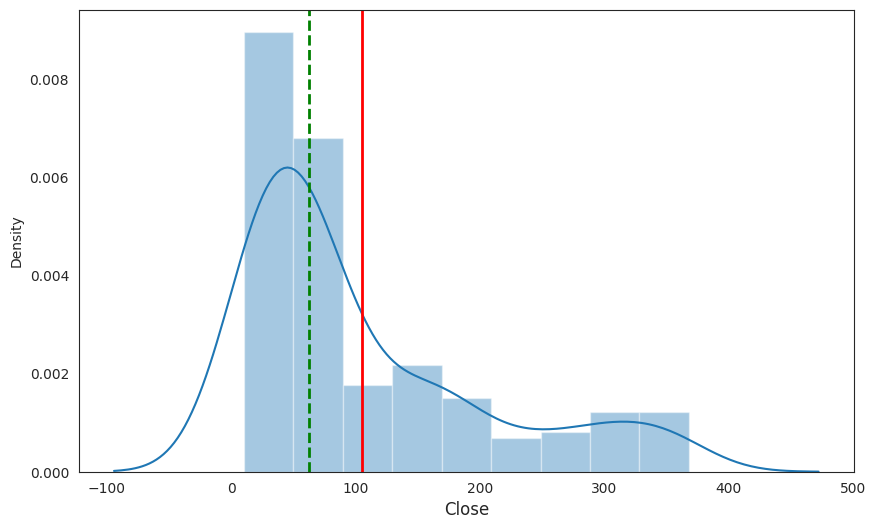

In [ ]:
#plotting the distribution of all features.
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.xlabel(col,fontsize=12)

  plt.axvline(df[col].mean(),linewidth='2',color='red')
  plt.axvline(df[col].median(),linewidth='2',color='green',linestyle='dashed')

From above plot We can clearly see that these distributions are positively skewed. The mean and median are at significant distance from each other.
So we need to transform them into something close to a Normal Distribution as our models give optimal results that way.

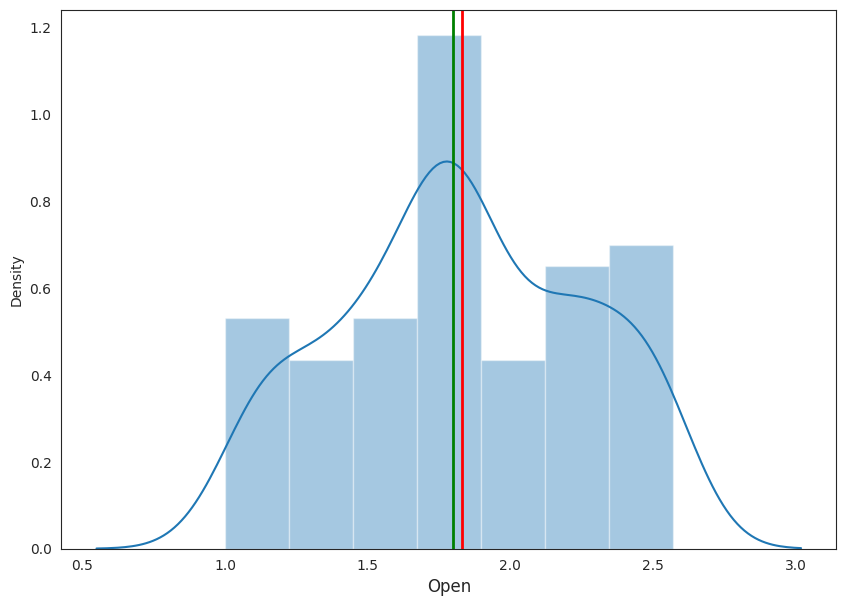

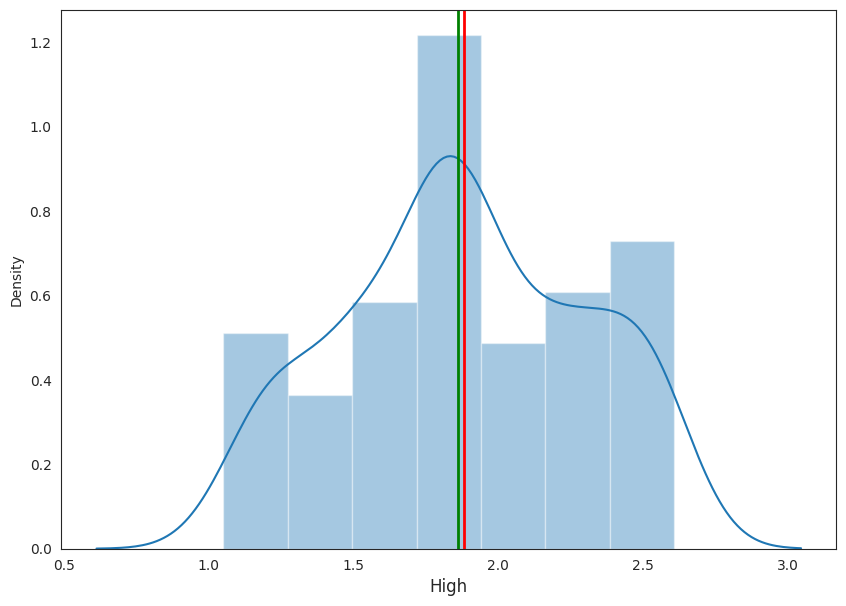

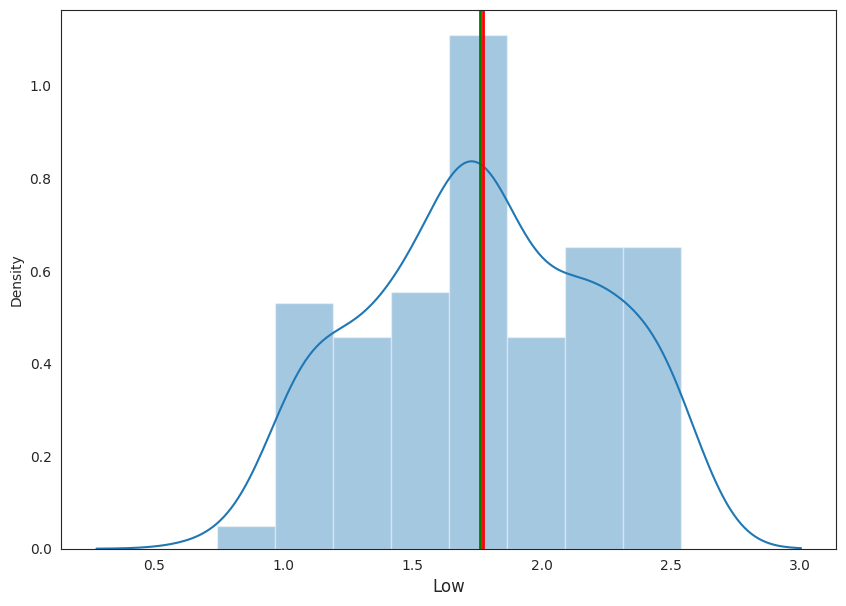

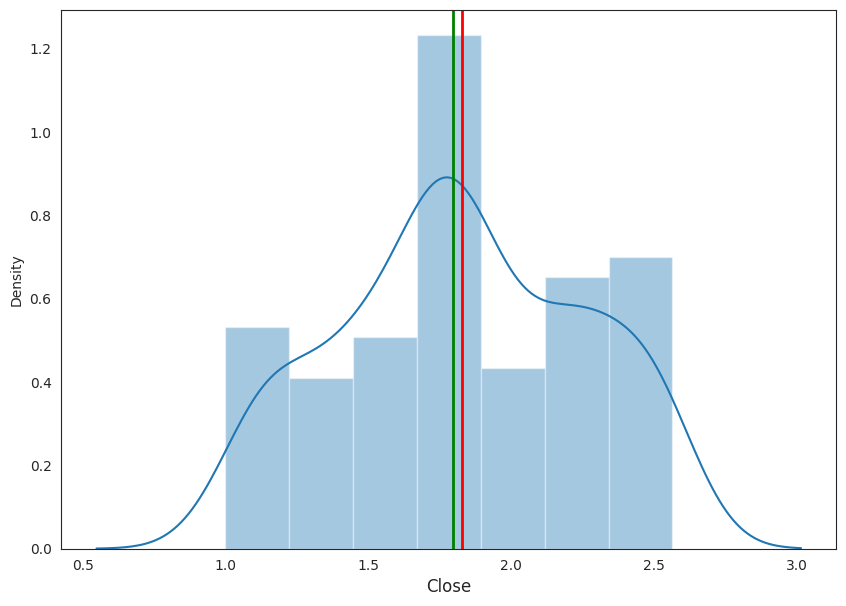

In [ ]:
for col in df.columns:
  plt.figure(figsize=(10,7))
  sns.distplot(np.log10(df[col]))
  plt.xlabel(col,fontsize=12)


  plt.axvline(np.log10(df[col]).mean(),color='red',linewidth=2)
  plt.axvline(np.log10(df[col]).median(),color='green',linewidth=2)

Now, the distributions are very similar to Normal distribution. The mean and median values are nearly same.

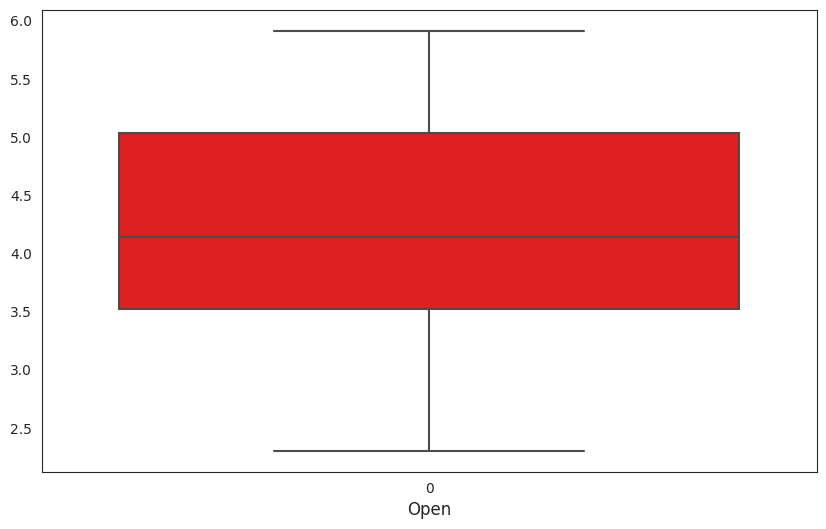

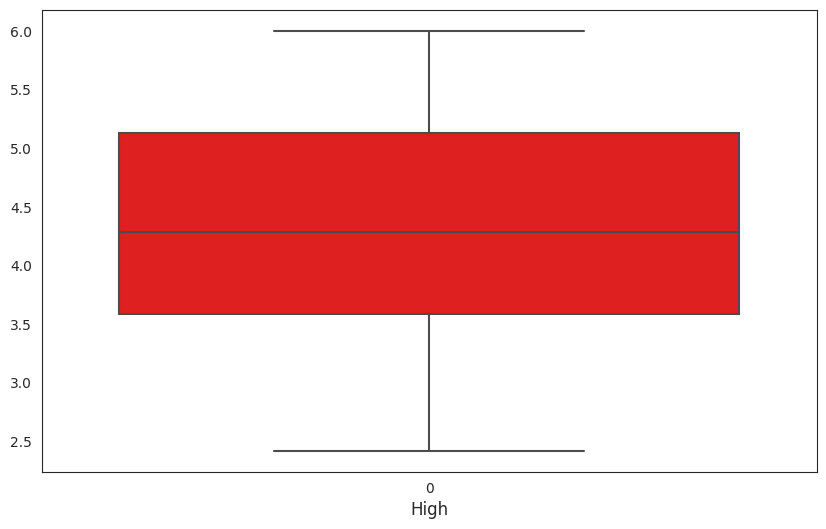

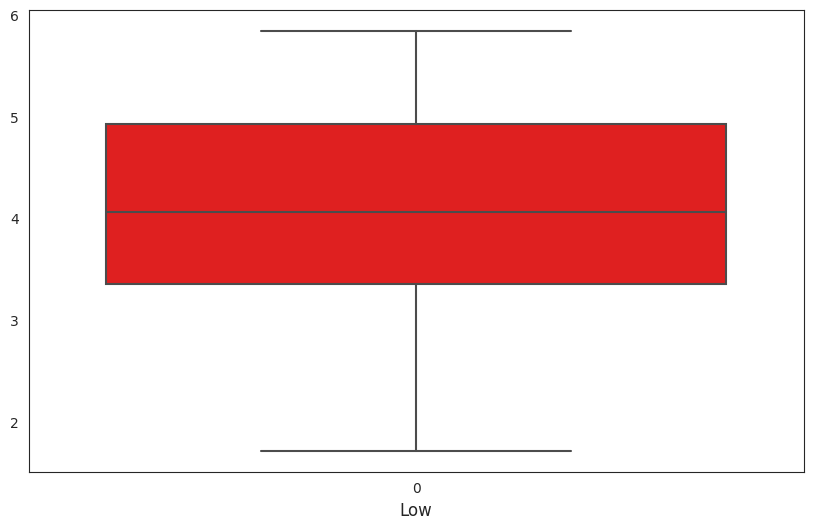

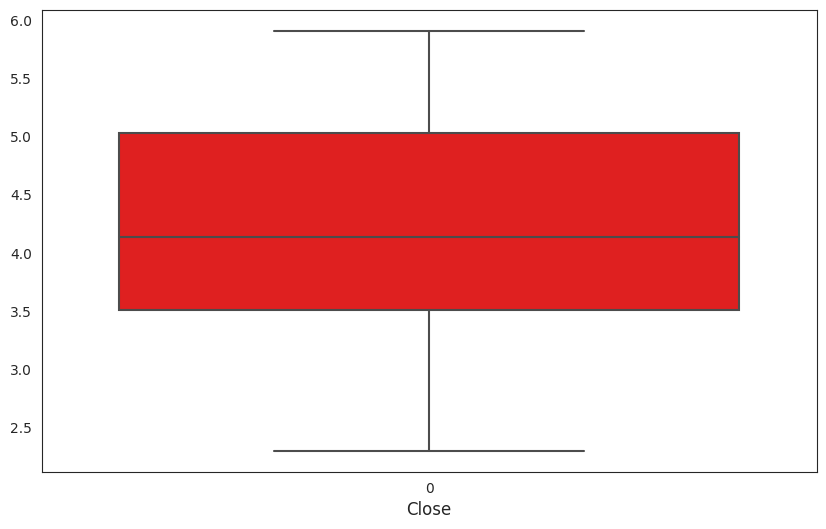

In [ ]:
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(np.log(df[col]),color='red')
  plt.xlabel(col,fontsize=12)

Now, we have no outliers. Log transformation diminishes the outlier's effect.
Since we have a very small dataset to work with, dropping the outliers completely is not a good idea. So this is how we are going to leave them

In [ ]:
#Seprating the dependent and independent variables
independent_variables = df.columns.tolist()[:-1]
dependent_variables = ['Close']

print(independent_variables)
print(dependent_variables)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?

* our dataset doesn't have any null value and duplicate value.
* we did copy of our data to preserve original data.
* converted to date variable from object datatype to date datatype.
* set date columns as index to track variation in stock price
* remove outlairs from dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

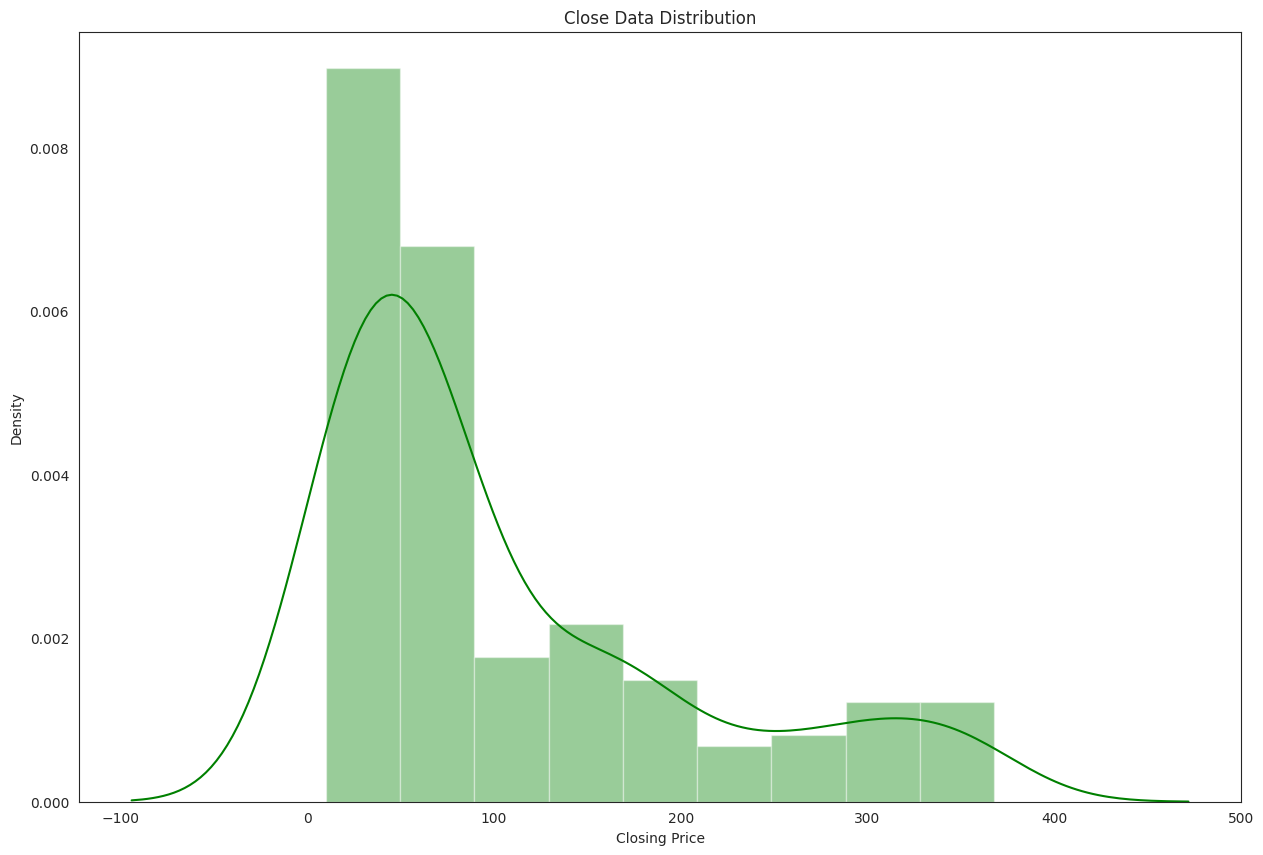

In [ ]:
#distrubtion of dependent feature
plt.figure(figsize=(15,10))
sns.distplot(df['Close'],color="g")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

##### 2. What is/are the insight(s) found from the chart?

the distribution plot provides a visual summary of the closing price data, enabling us to identify patterns, skewness, outliers, central tendency, and spread. These insights can help in understanding the nature of the data and making informed decisions or predictions related to the Yes Bank stock.

#### Chart - 2

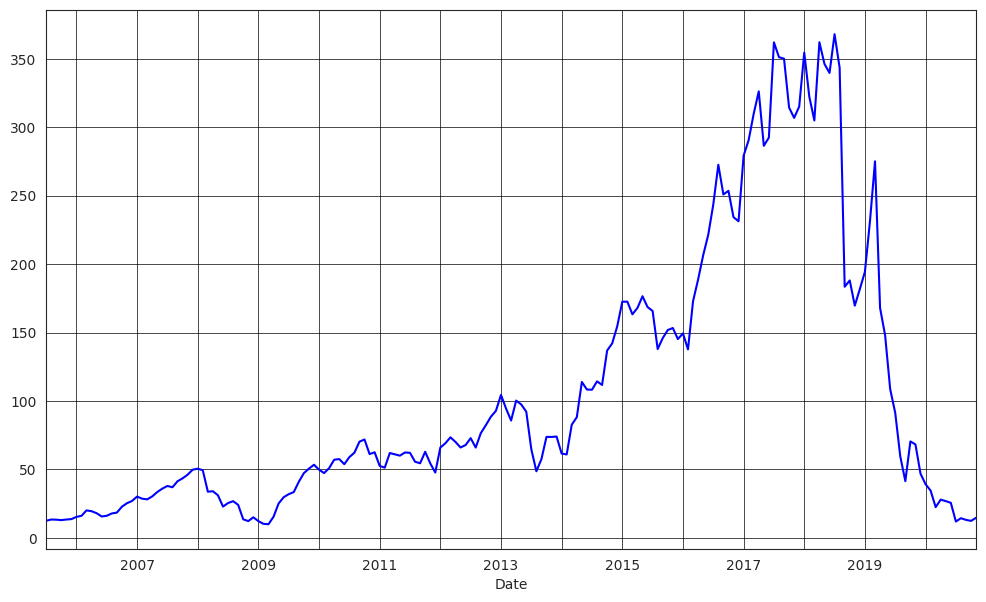

In [ ]:
# Chart - 2 visualization code

#plotting target variable
plt.figure(figsize=(12,7))
df['Close'].plot(color='blue')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='black')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='black')


##### 1. Why did you pick the specific chart?

The specific chart, a line plot of the 'Close' data, was chosen to visualize the trend and fluctuations in the closing prices of the Yes Bank stock over time.

##### 2. What is/are the insight(s) found from the chart?

We can see that the stock price is rising up until 2018 when the fraud case involving Rana Kapoor happened after which the stock price has had a sharp decline

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# scatter plot to see the relationship between dependent & independent variables
fig=px.scatter(df, x= 'High', y='Close', title= 'Relations between High and Close')
fig.update_layout (autosize=False, width=1000,height=500)
fig.show()

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

#Correlation between each independent variable using scatter plot
fig=px.scatter(df, x= 'High', y='Close', title= 'Relations between High and Close')
fig.update_layout (autosize=False, width=1000,height=500)
fig.show()


In [ ]:
fig=px.scatter(df, x= 'Open', y='Close', title= 'Relations between Open and Close')
fig.update_layout (autosize=False, width=1000,height=500)
fig.show()

In [ ]:
fig=px.scatter(df, x= 'Low', y='Close', title= 'Relations between Low and Close')
fig.update_layout (autosize=False, width=1000,height=500)
fig.show()

##### 1. Why did you pick the specific chart?

The specific chart, a scatter plot, was chosen to visualize the relationship between the 'Low' and 'Close' prices of the Yes Bank stock.

##### 2. What is/are the insight(s) found from the chart?

We can see that all of our independent variables are highly correlated to the dependent variable

#### Chart - 5 - Correlation Heatmap

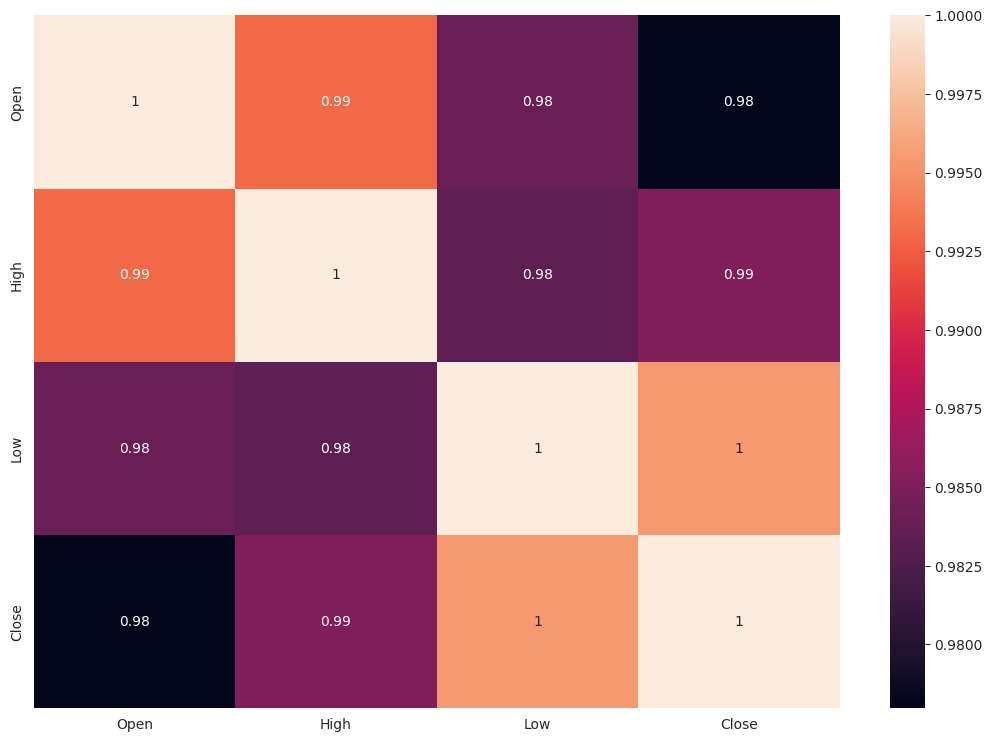

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(13,9))
cor= sns.heatmap(df.corr(), annot=True)

##### 1. Why did you pick the specific chart?

The correlation heatmap is an effective way to visualize the pairwise correlations between numerical variables in a dataset. It uses color coding to represent the strength and direction of the correlations, making it easier to identify patterns and relationships. By using a heatmap, it allows for a quick and intuitive understanding of the correlation structure of the variables.

##### 2. What is/are the insight(s) found from the chart?

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

#### Chart - 6 - Pair Plot

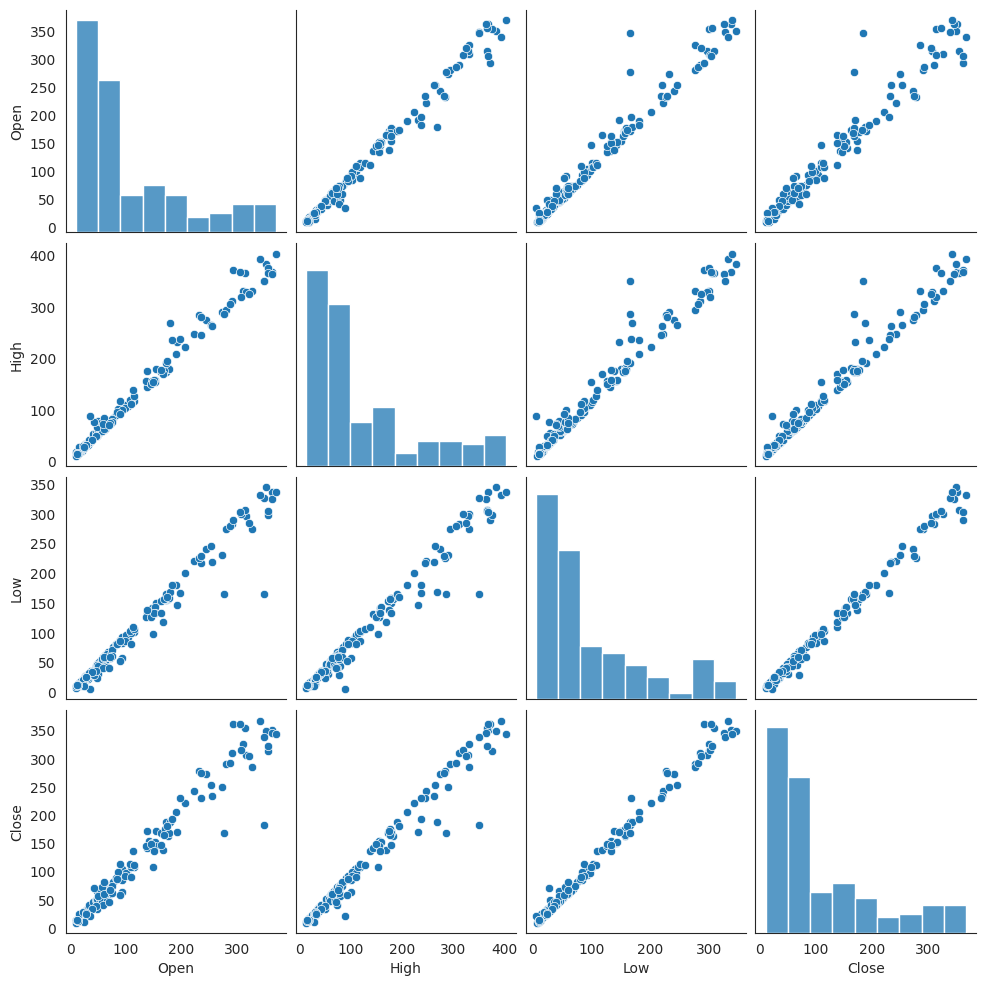

In [ ]:
# Pair Plot visualization code

sns.pairplot(df)

The pair plot is suitable when you want to visualize the relationships between multiple variables in a dataset. It creates a grid of scatter plots, making it easier to identify patterns, trends, and potential outliers. The pair plot allows for a comprehensive examination of the pairwise relationships, helping to understand how variables interact with each other.
 On the other hand, the pair plot provides a more comprehensive view of the relationships by displaying scatter plots for all possible variable combinations.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#Check for missing values
print(df.isnull().sum())

#Drop rows with missing values
df.dropna(inplace=True)

Open     0
High     0
Low      0
Close    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Dropping Rows with Missing Values:This technique removes rows that contain missing values. It is suitable when the missing values are random and do not significantly impact the overall dataset. Dropping rows can be appropriate when the missing data is relatively small compared to the available dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

we have seen earlier our dataset is small so we couldn't remove outlier because it will lead to loss of information

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

In our data set all the columns are numerical, including the 'Date' column being represented as an object type. Since all the columns are already numerical, there is no need for categorical encoding in this particular dataset.

Categorical encoding is typically required when you have categorical variables that need to be converted into numerical representations for analysis or machine learning tasks. In our case, all the columns ('Open', 'High', 'Low', 'Close') are numerical, representing different aspects of the stock closing price.

### 8. Data Splitting

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Create the data of independent and dependent variables
x = np.log10(df[independent_variables]).values
y = np.log10(df[dependent_variables]).values

# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, Y_train, Y_test = train_test_split( x , y , test_size = 0.2, random_state = 42)

In [ ]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [ ]:
#checking shape of testing dataset.
X_test.shape

(37, 3)

##### What data splitting ratio have you used and why?

A data splitting ratio of 80:20 has been used, meaning that 80% of the data is allocated for training the model, and 20% is reserved for testing the model's performance. This is specified by setting the test_size parameter in the train_test_split() function to 0.2.

## ***7. ML Model Implementation***

### ML Model - Linear Regression

In [ ]:
#fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train,Y_train)

linear_reg.intercept_

array([-0.00192001])

In [ ]:
linear_reg.coef_

array([[-0.61404573,  0.85165644,  0.7631522 ]])

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,Y_train), 3)

0.996

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,Y_test), 3)

0.989

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error((Y_test),(y_pred)),3)
print("MAE :", MAE)

MSE = round(mean_squared_error((Y_test),(y_pred)),3)
print("MSE :", MSE)

RMSE = round(np.sqrt(MSE),3)
print("RMSE :", RMSE)

R2 = round(r2_score((Y_test), (y_pred)),3)
print("R2 :" , R2)

Adjusted_R2 = round(1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2:", Adjusted_R2)

MAE : 0.028
MSE : 0.002
RMSE : 0.045
R2 : 0.989
Adjusted R2: 0.988


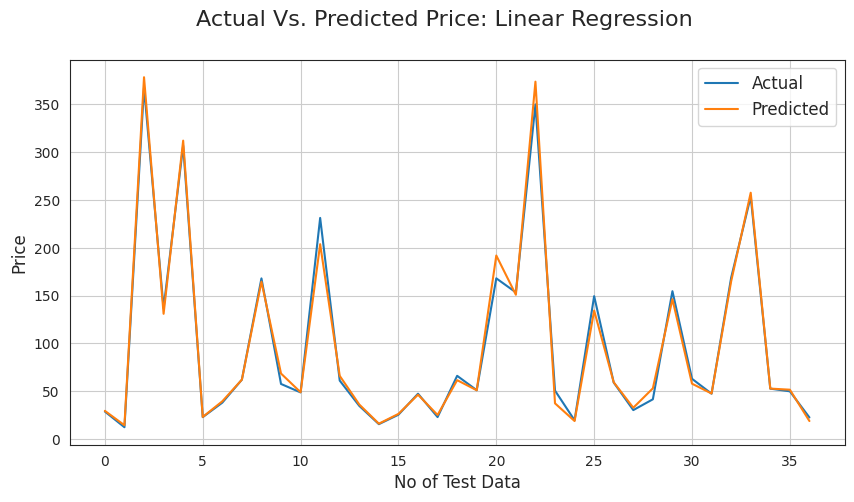

In [ ]:
# Actual Price vs. Predicted Price for Linear Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(np.array(10**Y_test))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()


### ML Model - Lasso Regression

In [ ]:
#fitting data into Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.005,max_iter=3000)
lasso_reg.fit(X_train,Y_train)

In [ ]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,Y_train),3)

0.992

In [ ]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(Y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(Y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(Y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(Y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(Y_test, y_pred_lasso), 3))

MSE : 0.003
RMSE : 0.051
MAE : 0.036
MAPE : 0.023
R2 : 0.983


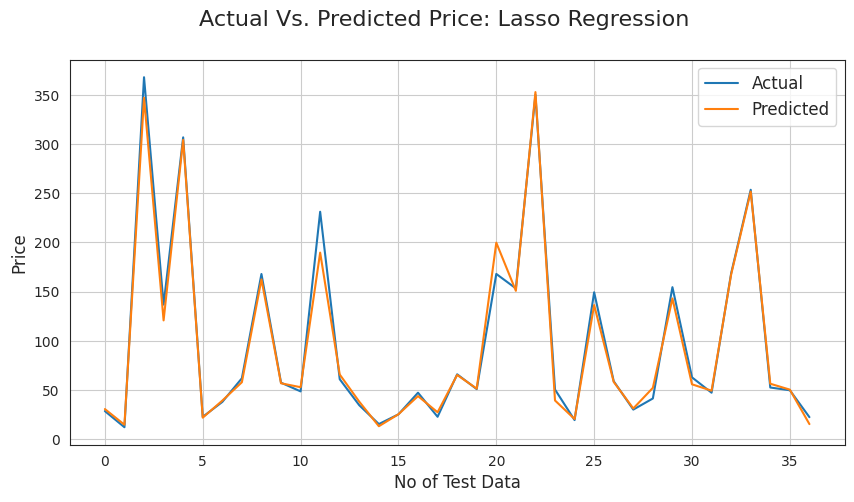

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(np.array(10**Y_test))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()


In [ ]:

print(lasso_reg.coef_)

[0.         0.32448667 0.64237598]


In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
lasso_cv = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,100,]}
# alpha is the hyperparameter which we wanted to tuned and inside we give some random values

#this GridSearchCV try each of the values of alpha (cv=5 means we dividing our data into 5 folds)
lasso_regressor = GridSearchCV(lasso_cv, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.0008131970274038796


In [ ]:
#generate predictions for the target variable
y_pred_lasso = lasso_regressor.predict(X_test)
print(y_pred_lasso)

[1.46791377 1.15585328 2.57795761 2.11690795 2.49423621 1.36155289
 1.59503401 1.79214664 2.21619154 1.83515795 1.6887063  2.30904495
 1.81929962 1.55606126 1.20298012 1.4181926  1.66529533 1.39851865
 1.78866581 1.70688027 2.28301609 2.17843733 2.5726065  1.57073527
 1.27269289 2.12802065 1.77267629 1.51361423 1.7234644  2.16504115
 1.76187281 1.67664382 2.21699654 2.41087029 1.72136837 1.71181885
 1.27226199]


Text(0.5, 1.0, 'Actual vs Predicted Closing price')

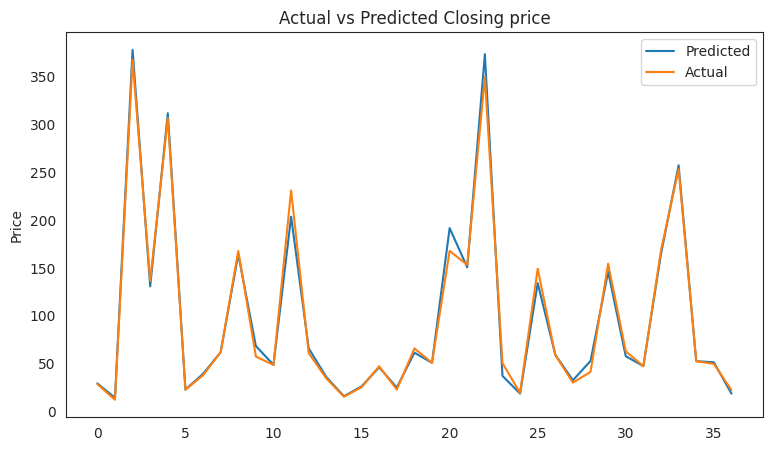

In [ ]:
#actual vs y_pred_lasso values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**Y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(Y_test, y_pred_lasso), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((Y_test),(y_pred_lasso)),3)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),3)
print("RMSE :" ,RMSE)

r2 = round(r2_score((Y_test), (y_pred_lasso)),3)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score(Y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3))


MAE : 0.028
MSE : 0.002
RMSE : 0.045
R2 : 0.989
Adjusted R2 :  0.988


### ML Model - Ridge Regression

In [ ]:
#fitting data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,Y_train)

In [ ]:
#accuracy of Ridge regression model
round(ridge_reg.score(X_train,Y_train),3)

0.996

In [ ]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(Y_test, y_pred_ridge), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((Y_test),(y_pred_ridge)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((Y_test), (y_pred_ridge)),4)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score(Y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))


MAE : 0.028
MSE : 0.0017
RMSE : 0.0412
R2 : 0.9889
Adjusted R2 :  0.9879


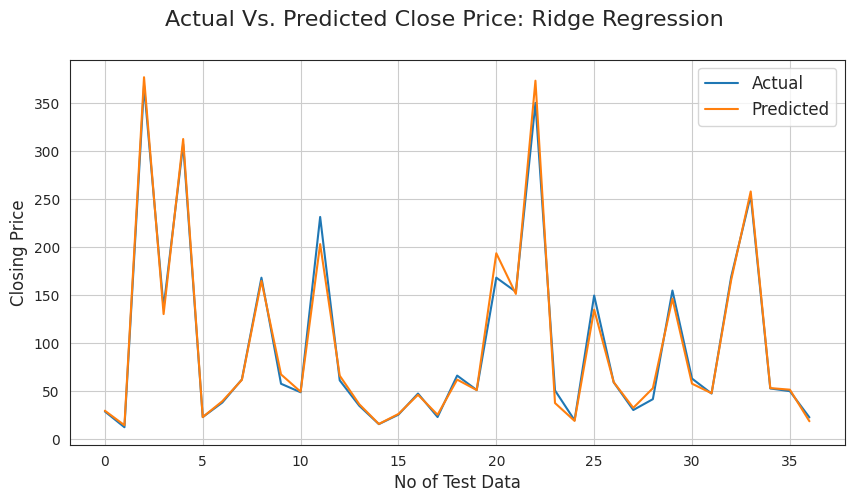

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(Y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [ ]:
# Hyperparameter tunning
ridge_reg = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

In [ ]:
print("The best fit alpha value is  :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is  : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.0008825699979614481


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Closing price')

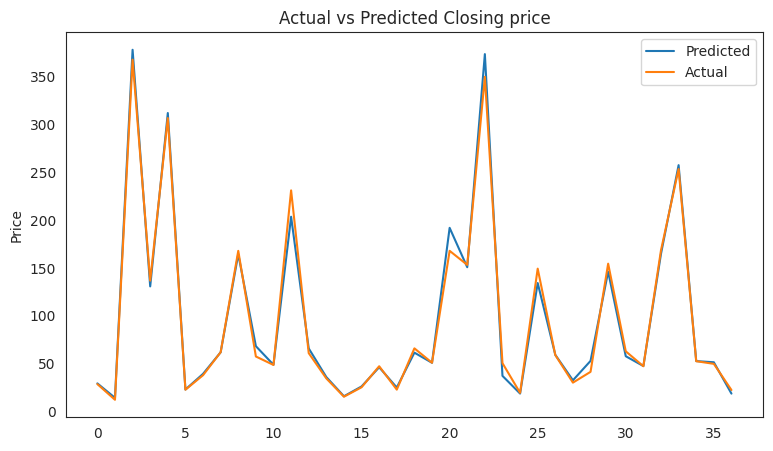

In [ ]:
#actual vs y_pred_ridge values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**Y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(Y_test, y_pred_ridge), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((Y_test),(y_pred_ridge)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((Y_test), (y_pred_ridge)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(Y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))


MAE : 0.028
MSE : 0.0017
RMSE : 0.0412
R2 : 0.9888
Adjusted R2 : 0.9878


### ML Model - Elastic Net Regression

In [ ]:
#fitting data into Elastic net Regression
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# fitting the train model
elasticnet.fit(X_train,Y_train)


In [ ]:
#accuracy of Elastic net regression model
elasticnet.score(X_train, Y_train)

0.8816419262627297

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(Y_test, y_pred_en), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((Y_test),(y_pred_en)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((Y_test), (y_pred_en)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(Y_test,y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MAE : 0.114
MSE : 0.0188
RMSE : 0.1371
R2 : 0.8789
Adjusted R2 : 0.8678


In [ ]:
# hyperparameter tunning
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15, 'l1_ratio': 0.3}

Using  {'alpha': 1e-15, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.0008131970274037663


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(Y_test, y_pred_en), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((Y_test),(y_pred_elastic)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((Y_test), (y_pred_elastic)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(Y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MAE : 0.114
MSE : 0.0017
RMSE : 0.0412
R2 : 0.9888
Adjusted R2 : 0.9878


Text(0.5, 1.0, 'Actual vs Predicted Closing price')

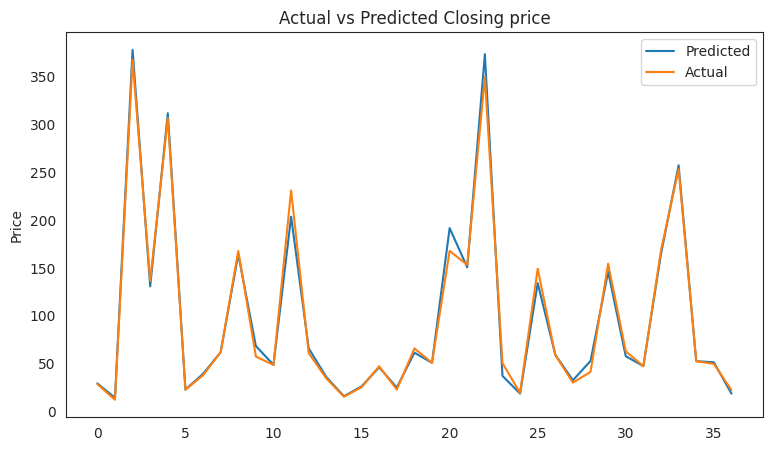

In [ ]:
#actual vs y_pred_elastic values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic)
plt.plot(np.array(10**Y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [ ]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

 # line initializes a counter variable
  i = 0

  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, Y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, Y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(Y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(Y_test, y_pred)),3)
    MAE = round(mean_absolute_error(Y_test, y_pred),3)
    #MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
    R2 = round(r2_score(Y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "R2"] = R2

    #to get values in next rows for next model
    i=i+1

  #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)

  return df

In [ ]:
all_model = [linear_reg, lasso_reg, ridge_reg, elasticnet]

In [ ]:
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, Y_train, Y_test, all_model)
matrics_compare_df

,Model,MSE,RMSE,MAE,R2
0,LinearRegression,0.002,0.042,0.028,0.989
1,Ridge,0.002,0.048,0.034,0.985
2,Lasso,0.003,0.051,0.036,0.983
3,ElasticNet,0.019,0.137,0.114,0.879


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.
After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.
There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.
There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.

we evaluated four models: Linear Regression, Ridge, Lasso, and ElasticNet. Among them, Linear Regression performed the best, achieving the lowest MSE (0.002), RMSE (0.042), MAE (0.028), and the highest R2 (0.989) values. It demonstrated exceptional accuracy in predicting the closing prices, outperforming the other models. Thus, Linear Regression is the most suitable model for accurately predicting the closing price of Yes Bank stock.

With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***